#  Tensors 

In [74]:
# what does the contravariant vector look like symbolically after the transform ?
a_1,a_2,a_3 = symbols('a_1,a_2,a_3')
v_sph = Matrix([a_1,a_2,a_3])
v_rect = J_1 * v_sph
v_rect
# vector in the cartesian coordinates from the spherical coordinates

⎡a₁⋅sin(y₂)⋅cos(y₃) + a₂⋅y₁⋅cos(y₂)⋅cos(y₃) - a₃⋅y₁⋅sin(y₂)⋅sin(y₃)⎤
⎢                                                                  ⎥
⎢a₁⋅sin(y₂)⋅sin(y₃) + a₂⋅y₁⋅sin(y₃)⋅cos(y₂) + a₃⋅y₁⋅sin(y₂)⋅cos(y₃)⎥
⎢                                                                  ⎥
⎣                    a₁⋅cos(y₂) - a₂⋅y₁⋅sin(y₂)                    ⎦

### example
   
Lets take a vector, represented in spherical coordinates, $(\mathbf e^\rho, \mathbf e^\theta, \mathbf e^\phi) = (\mathbf e^1, \mathbf e^2, \mathbf e^3) $ and represent it in barred rectangular coordinates $(\mathbf i, \mathbf j,\mathbf k)=(\mathbf {\hat{e}}^1,\mathbf {\hat{e}}^2,\mathbf {\hat{e}}^3)$ ...

lets say, $\mathbf v = 1.2  \mathbf e^1 + \pi 0.5  \mathbf e^2 + \pi  \mathbf e^3 $ and transform this vector ...
   
$$\frac{\partial A^i}{\partial t} = \frac{\partial A^i}{\partial u^r}\frac{\partial u^r}{\partial t} $$
   
Now $\mathbf A$ must be $\mathbf A = r\ \cos\phi\ \sin\theta\ \mathbf {\hat{e}}^1 + r\ \sin\phi\ \sin\theta\ \mathbf {\hat{e}}^2 + r\ \cos\theta\ \mathbf {\hat{e}}^3$ and for the derivatives of $\mathbf A$ with respect to the $u$ system I will use the jacobian (J_1) defined as "The Jacobian of the dx^i/dy^j where x's are cartesian and y's are spherical". 
   
now I will first compute the derivatives for each $u^i$ ...

   $$\frac{\partial u^1}{\partial t} = v^1$$
and
   $$\frac{\partial u^2}{\partial t} = v^2 $$
and
   $$\frac{\partial u^3}{\partial t} = v^3 $$

now in the code, the $u$ coordinates are labelled $y$ from earlier.

In [83]:
t = symbols('t')
v = Matrix([1.2, 0.5*3.14159,3.14159 ])
dAdt = J_1*v
dAdt

⎡-3.14159⋅y₁⋅sin(y₂)⋅sin(y₃) + 1.570795⋅y₁⋅cos(y₂)⋅cos(y₃) + 1.2⋅sin(y₂)⋅cos(y
⎢                                                                             
⎢3.14159⋅y₁⋅sin(y₂)⋅cos(y₃) + 1.570795⋅y₁⋅sin(y₃)⋅cos(y₂) + 1.2⋅sin(y₂)⋅sin(y₃
⎢                                                                             
⎣                      -1.570795⋅y₁⋅sin(y₂) + 1.2⋅cos(y₂)                     

₃)⎤
  ⎥
) ⎥
  ⎥
  ⎦

In [84]:
# earlier I forgot that the y_1 coordinate is the integral of its velocity - so I integrated these by hand
dAdt = dAdt.subs({y_1:1.2*t, y_2:0.5*3.14159*t, y_3:3.14159*t})

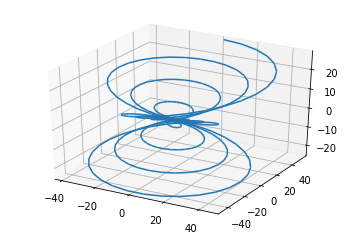

In [85]:
from sympy import symbols, cos, sin
from sympy.plotting import plot3d_parametric_line
%matplotlib inline

p1 = plot3d_parametric_line(dAdt[0], dAdt[1], dAdt[2], (t, 0, 15), show = False)

p1.show()

In [86]:
# nw for the position vector, in spherical coordinates
v2 = Matrix([1.2*t, 0.5*3.14159*t,3.14159*t ])
A_sph = Matrix([v2[0]*cos(v2[2]) * sin(v2[1]),v2[0]*sin(v2[2]) * sin(v2[1]),v2[0]* cos(v2[1])  ])
A_sph

⎡1.2⋅t⋅sin(1.570795⋅t)⋅cos(3.14159⋅t)⎤
⎢                                    ⎥
⎢1.2⋅t⋅sin(1.570795⋅t)⋅sin(3.14159⋅t)⎥
⎢                                    ⎥
⎣       1.2⋅t⋅cos(1.570795⋅t)        ⎦

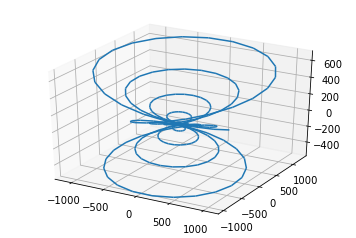

In [87]:
p1 = plot3d_parametric_line(A_sph[0]+dAdt[0]*t, A_sph[1]+dAdt[1]*t, A_sph[2]+dAdt[2]*t, (t, 0, 20), show = False)

p1.show()

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pylab
from matplotlib.text import Annotation

Obviously the green arrows don't match, I need to look up equations of motion in polar coords


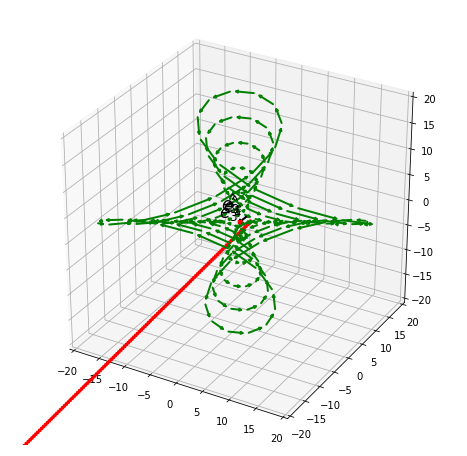

In [89]:


class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

# http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# posted this fancy arrow object
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)   
        
def PlotBasisCartesian():
    a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a) 
    annotate3D(ax, r'$ \hat{i}$', xyz=(1,0,0), fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{j}$', xyz=(0,1,0), fontsize=10, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{k}$', xyz=(0,0,1), fontsize=10, xytext=(-3,4),
                   textcoords='offset points', ha='right',va='bottom') 
    
# requires sympy vector
# requires CoordSysCartesian e
# requires Arrow3D
# requires Annotate3D
def plot_arrow(o, v1, e, name,col):
        LX=[float(N(o.dot(e.i))), float(N(v1.dot(e.i) + o.dot(e.i)))]
        LY=[float(N(o.dot(e.j))), float(N(v1.dot(e.j) + o.dot(e.j)))]
        LZ=[float(N(o.dot(e.k))), float(N(v1.dot(e.k) + o.dot(e.k)))]
        a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color=col)
        ax.add_artist(a)
        xyz_ = (LX[1], LY[1], LZ[1])
        annotate3D(ax, name, xyz=xyz_, fontsize=17, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

# requires plot_arrow
def plot_basis(o,v1,v2,v3,e,col):
    plot_arrow(o,v1,e,r'$ \hat{e_1}$',col)
    plot_arrow(o,v2,e,r'$ \hat{e_2}$',col)
    plot_arrow(o,v3,e,r'$ \hat{e_3}$',col)    
    
# set up some symbols, that don't clash with the numpy variables above
phi,theta1, rho1,zz  = symbols('phi,theta1, rho1,zz')

# create vector that transforms from cylindrical coordinates to cartesian
r = rho1*sin(theta1)*cos(phi)*e.i + rho1*sin(theta1)*sin(phi)*e.j + rho1*cos(theta1)*e.k

# differentiate the vector,
dr_rho = diff(r,rho1)
dr_theta = diff(r,theta1)
dr_phi = diff(r,phi)

# compute the coordinate vectors,  forming e_1 = (dr/du_1)/|dr/du_1|, etc
E1 = dr_rho / dr_rho.magnitude()
E2 = dr_theta / dr_theta.magnitude()
E3 = dr_phi / dr_phi.magnitude()

PI = 3.14159
theta_angle = PI/2-PI/12
phi_angle = 0
radius = 2
# add some numbers, keeping the frame for reuse
P1 =   r.subs( {rho1:radius, theta1:theta_angle, phi:phi_angle })
E1_1 = E1.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E2_1 = E3.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })
E3_1 = E2.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })

v = Matrix([1.2, 0.5*3.14159,3.14159 ])
dAdt = J_1.T*v
#dAdt = dAdt.subs({y_1:1.2*t, y_2:0.5*3.14159*t, y_3:3.14159*t})

dUdt_vec = dAdt[0] * e.i + dAdt[1] * e.j + dAdt[2] * e.k
A_plus_dAdt = r.subs({rho1:radius, theta1:theta_angle, phi:phi_angle })

ep = CoordSysCartesian('ep')

dUdt_polar = v[0] * ep.i + v[1] * ep.j + v[2] * ep.k
A_plus_dAdt_polar = radius * ep.i + theta_angle * ep.j + phi_angle * ep.k

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

PlotBasisCartesian()

zero_vec = 0*e.i+0*e.j+0*e.k

plot_basis(zero_vec, E1_1, E2_1, E3_1, e, "r")

for it in range(0,400):
    prev_vec = A_plus_dAdt 
    px = prev_vec.magnitude()
    ptheta = acos(prev_vec.dot(e.k)/px)
    pphi = atan( prev_vec.dot(e.j) / prev_vec.dot(e.i) )
    velocity_increment = dUdt_vec.subs({y_1:  v[0],y_2:v[1], y_3:v[2]})
    A_plus_dAdt = A_plus_dAdt + velocity_increment *1/10
    plot_arrow(prev_vec, A_plus_dAdt-prev_vec, e, "","r")
    
prev_vec = zero_vec
for it in range(0,200):
    prev_vec = A_plus_dAdt_polar 
    A_plus_dAdt_polar = A_plus_dAdt_polar + dUdt_polar*1/10
    old_vec = r.subs({rho1: prev_vec.dot(ep.i),theta1: prev_vec.dot(ep.j),phi: prev_vec.dot(ep.k)})
    new_vec = r.subs({rho1: A_plus_dAdt_polar.dot(ep.i),
                      theta1: A_plus_dAdt_polar.dot(ep.j),
                      phi: A_plus_dAdt_polar.dot(ep.k)})
    #print old_vec
    #print A_plus_dAdt_polar
    plot_arrow(old_vec, new_vec-old_vec, e, "","g")    

# draw vertical line from (70,100) to (70, 250)
plt.plot([0, 0], [1, 2], 'k-', lw=2)

# draw diagonal line from (70, 90) to (90, 200)
plt.plot([0, 0], [1, 2], 'k-')

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-20, 20)

print "Obviously the green arrows don't match, I need to look up equations of motion in polar coords"
plt.show()

So, clearly in the diagram, consistently updating a vector with the contravariant velocity (converted from polar coordinates) $  x = x_0 + v(t)\ t $, does in fact show a space curve (red). However the amusing part is the green arrows are all the same equation in spherical coordinates then converted to cartesian, the difference is that the spherical coordinate equation updates the angles independant of the radius - I need to look this up.

> The plot above does require a lot of extra code, however these code definitions can be useful to get a more precise understanding of tensor's in differential geometry and physics, unfortunately I can't make a package that would be visible on github.

### Velocity in curvlinear coordinates
   
If $\mathbf r = y^1\mathbf e_1  +y^2\mathbf e_2 +y^3\mathbf e_3$ is a vector in spherical coordinates then  $\mathbf v = \frac{d \mathbf r}{dt} = \dot{y}^1\mathbf e_1 +\dot{y}^2\mathbf e_2  + \dot{y}^3\mathbf e_3 $ and $\mathbf a = \frac{d\mathbf v}{dt} =\frac{d^2\mathbf r}{dt^2}=\ddot{y}^1\mathbf e_1  +\ddot{y}^2\mathbf e_2  + \ddot{y}^3\mathbf e_3 $ so to eypress these in rectangular coordinates the transform to cartesian is eypressed as
   
$$\mathbf r = \rho\ \cos\phi\ \sin\theta\ \mathbf i + \rho\ \sin\phi\ \sin\theta\ \mathbf j + \rho\ \cos\theta\ \mathbf k=y^1\ \cos (y^3)\ \sin (y^2)\ \mathbf i + y^1\ \sin (y^3)\ \sin (y^2)\ \mathbf j + y^1\ \cos (y^2)\ \mathbf k \qquad\qquad (3.0)$$

and so 

$$ \mathbf i =  \sin(y^2) \cos(y^3)\ \mathbf e_1 +  \cos(y^2) \cos(y^3)\ \mathbf e_2 - sin(y^2) \sin(y^3) \mathbf e_3 \qquad\qquad (3.01)$$
and
$$ \mathbf j =  \sin(y^2) \sin(y^3)\ \mathbf e_1 +  \cos(y^2) \sin(y^3)\ \mathbf e_2 + sin(y^2) \cos(y^3) \mathbf e_3 \qquad\qquad (3.02)$$
and
$$ \mathbf k =   \cos(y^2)\ \mathbf e_1 -  \sin(y^2) \mathbf e_2  \qquad\qquad (3.03)$$






$$\begin{array}{rcl}
\mathbf r	&	=	&	y^1\ \cos (y^3)\ \sin (y^2)\ (\sin(y^2) \cos(y^3)\ \mathbf e_1 +  \cos(y^2) \cos(y^3)\ \mathbf e_2 - sin(y^2) \sin(y^3) \mathbf e_3)        \\
	&	+	&	y^1\ \sin (y^3)\ \sin (y^2)\ (\sin(y^2) \sin(y^3)\ \mathbf e_1 +  \cos(y^2) \sin(y^3)\ \mathbf e_2 + sin(y^2) \cos(y^3) \mathbf e_3)      \\
	&	+	&	 y^1\ \cos (y^2)\ (\cos(y^2)\ \mathbf e_1 -  \sin(y^2) \mathbf e_2)   
 	 	 	 	\end{array}$$
                
This is equation $\qquad\qquad (3.1)$

changing notation makes this simpler, set $c_i = \cos(y^i), s_i = \sin(y^i)$ then

$$\mathbf r = y^1 c_3 s_2 ( s_2 c_3\mathbf e_1 + c_2 c_3 \mathbf e_2 - s_2 s_3 \mathbf e_3) + y^1 s_3 s_2( s_2 s_3 \mathbf e_1 + c_2 s_3 \mathbf e_2 + s_2 c_3 \mathbf e_3) + y^1 c_2 (c_2 \mathbf e_1 - s_2 \mathbf e_2)$$

and this expands to





$$\begin{array}{rcl}
\mathbf r 	&	=	&	y^1 c_3 s_2 s_2 c_3\mathbf e_1 + y^1 c_3 s_2 c_2 c_3 \mathbf e_2 - y^1 c_3 s_2 s_2 s_3 \mathbf e_3)       \\
	&	+	&	(y^1 s_3 s_2 s_2 s_3 \mathbf e_1 + y^1 s_3 s_2 c_2 s_3 \mathbf e_2 + y^1 s_3 s_2 s_2 c_3 \mathbf e_3)     \\
	&	+	&	(y^1 c_2 c_2 \mathbf e_1 - y^1 c_2 s_2 \mathbf e_2)   
 \end{array}$$

grouping terms by the $\mathbf e_i$ vectors gives $\qquad\qquad (3.12)$ ...


$$\begin{array}{rcl}
\mathbf r 	&	=	&	(y^1 c_3 s_2 s_2 c_3 +y^1 s_3 s_2 s_2 s_3 +y^1 c_2 c_2) \mathbf e_1       \\
	&	+	&	( y^1 c_3 s_2 c_2 c_3  + y^1 s_3 s_2 c_2 s_3 - y^1 c_2 s_2) \mathbf e_2     \\
	&	+	&	(y^1 s_3 s_2 s_2 c_3- y^1 c_3 s_2 s_2 s_3) \mathbf e_3   
 \end{array}$$

This can be factorized and simpifed using trignometric identities (i.e. $s_2^2 + c_2^2 = 1$ )...

$$ \mathbf r =  y^1( (c_3)^2 (s_2)^2 + (s_2)^2 (s_3)^2 + (c_2)^2) \mathbf e_1+ y^1(  (c_3)^2 s_2 c_2  +  (s_3)^2 s_2 c_2 -  c_2 s_2) \mathbf e_2  $$

$$\mathbf r = y^1 \mathbf e_1 = y^1(t) \mathbf e_1(t) \qquad\qquad (3.2) $$

$$\begin{array}{rcl}
\mathbf v	&	=	&	\frac{d\mathbf r}{dt}       \\
	&	= &	\frac{d y^1}{dt}\mathbf e_1 + y^1 \frac{d\mathbf e_1}{dt}     \\
&	=	&	\dot{y}^1 \mathbf e_1 + y^1 \dot{\mathbf e}_1   
 	 	 	 	\end{array}\qquad\qquad (3.21)$$
and acceleration

$$\begin{array}{rcl}
\mathbf a	&	=	&	\frac{d\mathbf v}{dt}       \\
 &	=	&	\frac{d}{dt}\left(\dot(y)^1 \mathbf e_1\right) + \frac{d}{dt}\left(y^1 \dot{\mathbf e_1}\right) \\
 &	=	&	\ddot{y}^1 \mathbf e_1 + 2 \dot{y}^1 \dot{\mathbf e}_1 + y^1 \ddot{\mathbf e}_1   
\end{array}\qquad\qquad (3.22)$$



from differential geometry (surfaces notebook) the $\mathbf {i,j,k}$ expressed in terms of the $\mathbf e_i$ vectors can be read off the jacobian rows, and divided by the magnitude of the row. We obtain the derivatives of the $\mathbf e_i$... 


$$\mathbf e_1 = s_2 c_3 \mathbf i + s_2 s_3 \mathbf j + c_2 \mathbf k \qquad\qquad (3.31)$$
and
$$\mathbf e_2 = c_2 c_3 \mathbf i + c_2 s_3 \mathbf j - s_2 \mathbf k\qquad\qquad (3.32)$$
and
$$\mathbf e_3 = - s_3 \mathbf i +  c_3 \mathbf j \qquad\qquad (3.33)$$

so

$$\frac{d \mathbf e_1}{dt} = \left( \frac{d s_2}{dt}c_3 + s_2 \frac{d c_3}{dt}  \right)\mathbf i +  \left(\frac{d s_2}{dt}s_3 + s_2\frac{d s_3}{dt} \right)\mathbf j + \left( - s_2 \dot{y}^2 \right)\mathbf k \qquad\qquad (3.4)$$

from the chain rule, since $s_2 = \sin(y^2) \implies \frac{ds_2}{dt} = c_2 \frac{dy^2}{dt}$

$$\left( \dot{y}^2 c_2 c_3 - \dot{y}^3 s_2  s_3   \right)\mathbf i +  \left( c_2 \dot{y}^2 s_3 + s_2 c_3\dot{y}^3 \right)\mathbf j + \left( - s_2 \dot{y}^2 \right)\mathbf k \qquad\qquad (3.41)$$ 

(the implication is implied) and this happens to be $\dot{\mathbf {e}}_1 = \dot{y}^2 \mathbf e_2 + s_2 \dot{y}^3 \mathbf e_3 $ (as the collected terms appear above).

$$\frac{d\mathbf e_2}{dt} = \left( -\dot{y} ^2 s_2 c_3 - \dot{y}^3 c_2 s_3\right)\mathbf i + \left( -\dot{y}^2 s_2 s_3 + \dot{y}^3 c_2 c_3 \right) \mathbf j - \dot{y}^2 c_2 \mathbf k \qquad\qquad (3.42)$$

$$\frac{d\mathbf e_3}{dt} = -\dot{y}^3 c_3  \mathbf i -  \dot{y}^3  s_3 \mathbf j \qquad\qquad (3.43)$$

now for the second derivatives ...
   
$$\mathbf {\ddot{e}}_1 = \frac{d^2 \mathbf e_1}{dt^2}=\frac{d}{dt} \left( \frac{d\mathbf e_1}{dt}\right) \qquad\qquad (3.5)$$

and so, for the $\mathbf i$ component, 



$$\begin{array}{rcl}
\frac{d}{dt}\left( \dot{y}^2 c_2 c_3 - \dot{y}^3 s_2  s_3   \right)	&	=	&	 (\ddot{y}^2 c_2 c_3 - \left(\dot{y}^2)^2 s_2 c_3 - \dot{y}^2 \dot{y}^3 c_2 s_3 ) - (\ddot{y}^3 s_2  s_3 + \dot{y}^3 \dot{y}^2 c_2  s_3 +  (\dot{y}^3)^2 s_2  c_3 \right)      \\
	& = &	 \ddot{y}^2 c_2 c_3 - (\dot{y}^2)^2 s_2 c_3 - 2\dot{y}^2 \dot{y}^3 c_2 s_3  - \ddot{y}^3 s_2  s_3   - (\dot{y}^3)^2 s_2  c_3		   
\end{array} \qquad\qquad (3.51)$$

for the $\mathbf j$ component,
   

$$\begin{array}{rcl}
 \frac{d}{dt}\left(c_2 \dot{y}^2 s_3 + s_2 c_3\dot{y}^3\right)	&	=	&	(-s_2 (\dot{y}^2)^2 s_3 + c_2 \ddot{y}^2 s_3 + c_2 \dot{y}^2 \dot{y}^3 c_3 ) + ( c_2 c_3\dot{y}^3 \dot{y}^2 - s_2 s_3(\dot{y}^3)^2+s_2 c_3\ddot{y}^3)     \\
	& =	 &-s_2 (\dot{y}^2)^2 s_3 + c_2 \ddot{y}^2 s_3 + 2 \dot{y}^3 \dot{y}^2 c_2 c_3 - s_2 s_3(\dot{y}^3)^2+s_2 c_3\ddot{y}^3		   
\end{array}\qquad\qquad (3.52)$$


   
and for the $\mathbf k$ component,
   
$$\frac{d}{dt} \left( - s_2 \dot{y}^2 \right) = - c_2 (\dot{y}^2)^2 -  s_2 \ddot{y}^2 \qquad\qquad (3.53)$$ 

I also have that the acceleration due to the changing velocity can be represented in terms of the tangent, normal, and binormal. $\mathbf v = v \mathbf T $ where $\mathbf T$ is the unit tangent vector. Then $\mathbf a = \dot{v}\mathbf T + v \frac{d\mathbf T}{ds} \frac{ds}{dt}$, and $s$ is the arc length parameter, $v=\frac{ds}{dt}$ and $\frac{d\mathbf T}{ds} = \kappa \mathbf N$ then $\mathbf a = \dot{v} \mathbf T + \kappa v^2 \mathbf N $

taking $\mathbf v = \rho \mathbf e_\rho + \theta \mathbf e_\theta + \phi \mathbf e_\phi $ and in this system $\mathbf r = \mathbf v\ t + \mathbf r_0 $ where t is time and $\mathbf r_0$ is initial position, taken to be zero, then

$$ x^1 = \rho t \sin( \theta t)\ \cos(\phi t), \quad x^2 = \rho t \sin( \theta t)\ \sin(\phi t), \quad x^3 = \rho t \cos(\theta t) $$
   
### ?

> Note there is a problem with Sympy's latex printer in the case of trying to print superscript indicies raised to a power, i.e. $(y^1)^2$ is not output correctly and causes the latex printer to crash.

From the above definitions of velocity, (of course the dot above the symbol denotes differentiation with respect to time).

$$\mathbf v = \frac{d\mathbf r}{dt} = \dot{y}^1 \mathbf e_1 + y^1 \dot{\mathbf {e}}_1 $$

and the new expressions for $\dot{\mathbf e}_1=\frac{d\mathbf e_1}{dt}$ the substitution of (3.31) and (3.41) into the equation above... 

$$\mathbf v = \frac{d\mathbf r}{dt} =\dot{y}^1(s_2 c_3 \mathbf i + s_2 s_3 \mathbf j + c_2 \mathbf k) + y^1 (\left( \dot{y}^2 c_2 c_3 - \dot{y}^3 s_2  s_3   \right)\mathbf i +  \left( c_2 \dot{y}^2 s_3 + s_2 c_3\dot{y}^3 \right)\mathbf j + \left( - s_2 \dot{y}^2 \right)\mathbf k)$$


so simplifying

$$\mathbf v =  ( \dot{y}^1 s_2 c_3 +y^1 \dot{y}^2 c_2 c_3 - y^1 \dot{y}^3 s_2  s_3 ) \mathbf i + (\dot{y}^1 s_2 s_3+y^1 c_2 \dot{y}^2 s_3 + y^1 s_2 c_3\dot{y}^3) \mathbf j + (\dot{y}^1 c_2- s_2 y^1 \dot{y}^2) \mathbf k  \qquad\qquad (3.6)$$

Therefore we have the differential equations ...
   
$$ \dot{x}^1 = \dot{y}^1 s_2 c_3 +y^1 \dot{y}^2 c_2 c_3 - y^1 \dot{y}^3 s_2  s_3 \qquad\qquad (3.61)$$

and
   
$$\dot{x}^2 = \dot{y}^1 s_2 s_3+y^1 c_2 \dot{y}^2 s_3 + y^1 s_2 c_3\dot{y}^3 \qquad\qquad (3.62)$$

and

$$ \dot{x}^3 = \dot{y}^1 c_2- s_2 y^1 \dot{y}^2 \qquad\qquad (3.63)$$
   
And I'm sure some of them might contain coriolis forces and centrifugal forces, for example.


Now for the acceleration
   
$$ \mathbf a = \frac{d\mathbf v}{dt} = \frac{d^2\mathbf r}{dt^2} = = \frac{d}{dt}(\dot{y}^1 \mathbf e_1(t) + y^1(t) \dot{\mathbf {e}}_1 ) = \ddot{y}^1 \mathbf e_1(t)+ 2\dot{y}^1\dot{\mathbf {e}}_1  + y^1(t) \ddot{\mathbf {e}}_1 $$

so, substituting 

$$\mathbf e_1 = s_2 c_3 \mathbf i + s_2 s_3 \mathbf j + c_2 \mathbf k$$

and

$$ \dot{\mathbf e}_1 = \left( \dot{y}^2 c_2 c_3 - \dot{y}^3 s_2  s_3   \right)\mathbf i +  \left( c_2 \dot{y}^2 s_3 + s_2 c_3\dot{y}^3 \right)\mathbf j + \left( - s_2 \dot{y}^2 \right)\mathbf k $$ 

and


$$\begin{array}{rcl}
\ddot{\mathbf e}_1 	&	=	&	(\ddot{y}^2 c_2 c_3 - (\dot{y}^2)^2 s_2 c_3 - 2\dot{y}^2 \dot{y}^3 c_2 s_3  - \ddot{y}^3 s_2  s_3   - (\dot{y}^3)^2 s_2  c_3) \mathbf i        \\
	&	+	&(-s_2 (\dot{y}^2)^2 s_3 + c_2 \ddot{y}^2 s_3 + 2 \dot{y}^3 \dot{y}^2 c_2 c_3 - s_2 s_3(\dot{y}^3)^2+s_2 c_3\ddot{y}^3) \mathbf j \\
    & - & ( c_2 (\dot{y}^2)^2 +  s_2 \ddot{y}^2)\mathbf k
\end{array}$$
the acceleration is $\qquad\qquad (3.7)$ ...
   

$$\begin{array}{rcl}
 \mathbf a 	&	=	&	\ddot{y}^1 (s_2 c_3 \mathbf i + s_2 s_3 \mathbf j + c_2 \mathbf k)       \\
	&	+	&2\dot{y}^1(\left( \dot{y}^2 c_2 c_3 - \dot{y}^3 s_2  s_3   \right)\mathbf i +  \left( c_2 \dot{y}^2 s_3 + s_2 c_3\dot{y}^3 \right)\mathbf j + \left( - s_2 \dot{y}^2 \right)\mathbf k) \\
    & + & y^1(t) ((\ddot{y}^2 c_2 c_3 - (\dot{y}^2)^2 s_2 c_3 - 2\dot{y}^2 \dot{y}^3 c_2 s_3  - \ddot{y}^3 s_2  s_3   - (\dot{y}^3)^2 s_2  c_3) \mathbf i + (-s_2 (\dot{y}^2)^2 s_3 + c_2 \ddot{y}^2 s_3 + 2 \dot{y}^3 \dot{y}^2 c_2 c_3 - s_2 s_3(\dot{y}^3)^2+s_2 c_3\ddot{y}^3) \mathbf j -( c_2 (\dot{y}^2)^2 +  s_2 \ddot{y}^2)\mathbf k)
\end{array}$$

multiplying through the brackets ...



$$\begin{array}{rcl}
=	&	\ddot{y}^1 s_2 c_3 \mathbf i + \ddot{y}^1 s_2 s_3 \mathbf j + \ddot{y}^1 c_2 \mathbf k 	&	+       \\
	&	\left( 2\dot{y}^1 \dot{y}^2 c_2 c_3 - 2\dot{y}^1 \dot{y}^3 s_2  s_3   \right)\mathbf i+\left( c_2 \dot{y}^2 s_3 2\dot{y}^1 + s_2 c_3\dot{y}^3 2\dot{y}^1 \right)\mathbf j + \left( - s_2 2\dot{y}^1 \dot{y}^2 \right)\mathbf k	&	+     \\
	&	(y^1(t) \ddot{y}^2 c_2 c_3 - y^1(t)( \dot{y}^2)^2 s_2 c_3 - y^1(t) 2\dot{y}^2 \dot{y}^3 c_2 s_3  - y^1(t) \ddot{y}^3 s_2  s_3   - y^1(t) (\dot{y}^3)^2 s_2  c_3) \mathbf i	&	+   \\
	&	(-y^1(t) s_2 (\dot{y}^2)^2 s_3 + y^1(t) c_2 \ddot{y}^2 s_3 + y^1(t) 2 \dot{y}^3 \dot{y}^2 c_2 c_3 - y^1(t) s_2 s_3(\dot{y}^3)^2+y^1(t) s_2 c_3\ddot{y}^3) \mathbf j	&	- \\
& ( y^1(t) c_2 (\dot{y}^2)^2 +  y^1(t) s_2 \ddot{y}^2)\mathbf k & 
 	 	 	 	\end{array} \qquad\qquad (3.71)$$

grouping terms    
   


$$\begin{array}{rcl}
=	&	(\ddot{y}^1 s_2 c_3 +2\dot{y}^1 \dot{y}^2 c_2 c_3 - 2\dot{y}^1 \dot{y}^3 s_2  s_3 + y^1 \ddot{y}^2 c_2 c_3 - y^1( \dot{y}^2)^2 s_2 c_3 - y^1 2\dot{y}^2 \dot{y}^3 c_2 s_3  - y^1 \ddot{y}^3 s_2  s_3   - y^1 (\dot{y}^3)^2 s_2  c_3)\mathbf i 	&	+       \\
&	(\ddot{y}^1 s_2 s_3 + 2 c_2  s_3 \dot{y}^2 \dot{y}^1  + 2 s_2 c_3\dot{y}^3 \dot{y}^1 -y^1 s_2 (\dot{y}^2)^2 s_3 + y^1 c_2 \ddot{y}^2 s_3 + 2 y^1  \dot{y}^3 \dot{y}^2 c_2 c_3 - y^1 s_2 s_3(\dot{y}^3)^2+y^1 s_2 c_3\ddot{y}^3 )\mathbf j 	&	+     \\
&(\ddot{y}^1 c_2 - s_2 2\dot{y}^1 \dot{y}^2 -y^1 c_2 (\dot{y}^2)^2 -  y^1 s_2 \ddot{y}^2 )\mathbf k	&	
\end{array} \qquad\qquad (3.72)$$

and so, quite simply, one would expect, 

$$ \mathbf v = \mathbf v_0 + \mathbf a t$$
  
and displacement

$$ \mathbf x = \mathbf x_0 + \mathbf v_0 t + \frac{1}{2}\mathbf a t^2 $$ 

now differentiating the term for velocity (using just the velocity of the x^1 first)
   
$$ (\ddot{x}^1)=\frac{d}{dt} (\dot{x}^1) = \frac{d}{dt}\left(\dot{y}^1 s_2 c_3 +y^1 \dot{y}^2 c_2 c_3 - y^1 \dot{y}^3 s_2  s_3 \right)$$

is 

$$\ddot{y}^1 s_2 c_3 + \dot{y}^1 \dot{y}^2 c_2 c_3 - \dot{y}^1 \dot{y}^3 s_2 s_3  +\dot{y}^1 \dot{y}^2 c_2 c_3 + y^1 \ddot{y}^2 c_2 c_3 - y^1 (\dot{y}^2)^2 s_2 c_3 - y^1 \dot{y}^3 \dot{y}^2 c_2 s_3  - \dot{y}^1 \dot{y}^3 s_2  s_3 - y^1 \ddot{y}^3 s_2  s_3 - y^1 \dot{y}^3 \dot{y}^2 c_2  s_3 - y^1 (\dot{y}^3)^2 s_2  c_3  $$


simplifying ...
   
$$\ddot{y}^1 s_2 c_3 +  2 \dot{y}^1 \dot{y}^2 c_2 c_3 - 2\dot{y}^1 \dot{y}^3 s_2 s_3   + y^1 \ddot{y}^2 c_2 c_3 - y^1 (\dot{y}^2)^2 s_2 c_3 -  2 y^1 \dot{y}^3 \dot{y}^2 c_2 s_3  - y^1 \ddot{y}^3 s_2  s_3 - y^1 (\dot{y}^3)^2 s_2  c_3  $$

We get the $\mathbf i$ component of (3.72). Then for the next component
   
$$\ddot{x}^2 = \frac{d}{dt}\left(\dot{y}^1 s_2 s_3+y^1 c_2 \dot{y}^2 s_3 + y^1 s_2 c_3\dot{y}^3\right) $$
and this is
   



$$\begin{array}{rcl}
=	&\ddot{y}^1 s_2 s_3 + \dot{y}^1\dot{y}^2 c_2 s_3 +\dot{y}^1 \dot{y}^3 s_2 c_3 + \dot{y}^1 c_2 \dot{y}^2 s_3 -y^1 \dot{y}^2 s_2 \dot{y}^2 s_3 	&	+       \\
	&y^1 c_2 \ddot{y}^2 s_3 +y^1 c_2 \dot{y}^2 \dot{y}^3 c_3 + \dot{y}^1 s_2 c_3\dot{y}^3 	&	+     \\
&	y^1 \dot{y}^2 c_2 c_3\dot{y}^3-y^1 s_2 s_3(\dot{y}^3)^2+y^1 s_2 c_3\ddot{y}^3	&	
\end{array}$$

simplifying ...



$$\begin{array}{rcl}
=	&\ddot{y}^1 s_2 s_3 + 2\dot{y}^1\dot{y}^2 c_2 s_3 	&	+       \\
	&2 \dot{y}^1 \dot{y}^3 s_2 c_3  -y^1 (\dot{y}^2)^2 s_2 s_3 + y^1 c_2 \ddot{y}^2 s_3	& +     \\
&	2 y^1 c_2 \dot{y}^2 \dot{y}^3 c_3  -y^1 s_2 s_3(\dot{y}^3)^2+y^1 s_2 c_3\ddot{y}^3	&	
\end{array} \qquad\qquad (3.73)$$


and for the $\mathbf k$ component

$$ \ddot{x}^3 = \frac{d}{dt}\left(\dot{y}^1 c_2- s_2 y^1 \dot{y}^2\right) \qquad\qquad (3.74)$$

and this is 
   
$$ \ddot{x}^3 = \ddot{y}^1 c_2 - \dot{y}^1 \dot{y}^2 s_2- c_2 y^1 (\dot{y}^2)^2 - s_2 \dot{y}^1 \dot{y}^2 - s_2 y^1 \ddot{y}^2 \qquad\qquad (3.75)$$

I could have found the term for acceleration either way.

### But ...

If the velocities in spherical coordinates are constant, then  $\ddot{\mathbf r} = \mathbf 0$ since $\ddot {y}^i = 0$ and yet the acceleration in cartesian coordinates is not zero. To differentiate the tensor in spherical coordinates may be impossible then - or with a covariant derivative?